In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a new synthetic dataset
np.random.seed(1)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).squeeze() + np.random.normal(0, 0.1, X.shape[0])

The predictions are: 0.2041 0.2041 0.2041 0.2224 0.3633 0.4484 0.5612 0.6180 0.7659 0.7551
The actual values are: 0.1624 0.0397 0.1478 0.1911 0.4797 0.2537 0.7441 0.5735 0.7549 0.7640


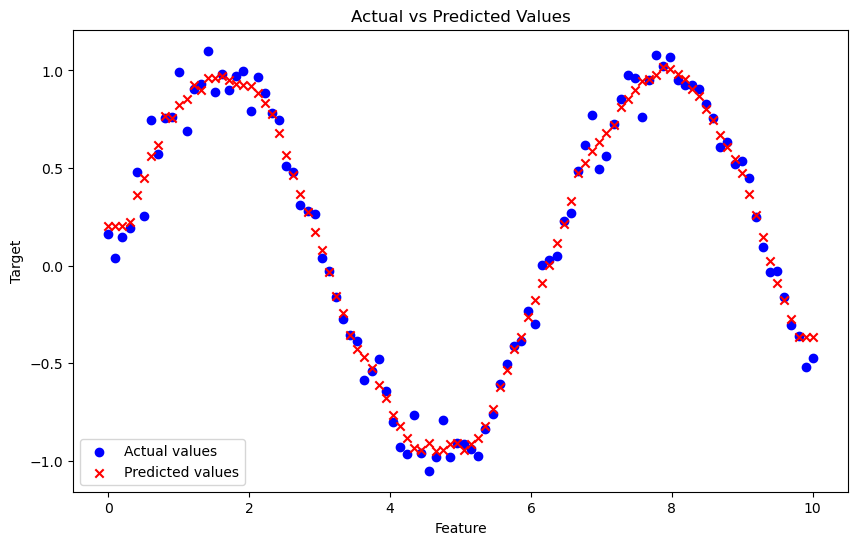

In [6]:
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.array([self._predict(x) for x in X])
        return predictions

    def _predict(self, x):
        # Compute distances between x and all points in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Get indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Return the mean of the k nearest neighbors' target values
        k_nearest_values = self.y_train[k_indices]
        return np.mean(k_nearest_values)


# Example usage
if __name__ == "__main__":
    # Create and train the KNN Regressor
    knn_model = KNNRegressor(k=5)
    knn_model.fit(X, y)
    
    # Make predictions
    predictions = knn_model.predict(X)
    
    # Display predictions and actual values
    print("The predictions are:", " ".join(f"{val:.4f}" for val in predictions[:10]))
    print("The actual values are:", " ".join(f"{val:.4f}" for val in y[:10]))
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual values')
    plt.scatter(X, predictions, color='red', label='Predicted values', marker='x')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

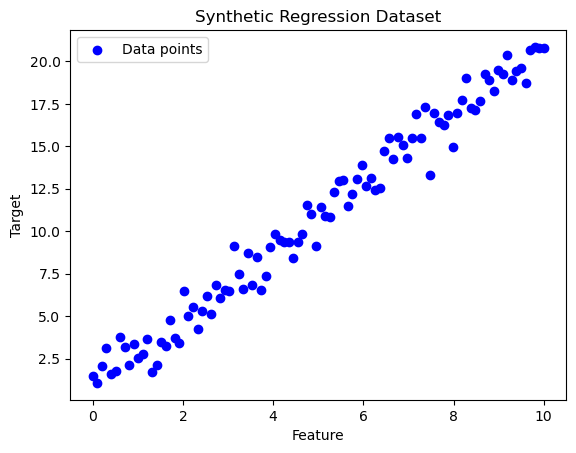

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_synthetic_data(n_samples=100):
    X = np.linspace(0, 10, n_samples)
    y = 2 * X + 1 + np.random.normal(scale=1, size=n_samples)  # Linear relationship with noise
    return X.reshape(-1, 1), y

# Generate dataset
X, y = generate_synthetic_data()

# Plot the dataset
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Synthetic Regression Dataset')
plt.legend()
plt.show()

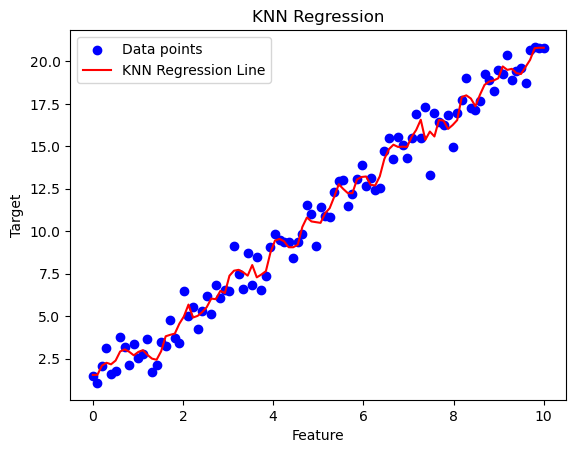

In [8]:
from scipy.spatial import distance

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i, x_test in enumerate(X_test):
            # Compute distances from x_test to all points in X_train
            distances = np.array([distance.euclidean(x_test, x_train) for x_train in self.X_train])
            # Find the k-nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_targets = self.y_train[k_indices]
            # Predict the mean of the k-nearest targets
            y_pred[i] = np.mean(k_nearest_targets)
        return y_pred

# Initialize and train KNN regressor
knn_regressor = KNNRegressor(k=3)
knn_regressor.fit(X, y)

# Make predictions
y_pred = knn_regressor.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='KNN Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('KNN Regression')
plt.legend()
plt.show()